<a href="https://colab.research.google.com/github/reedmarkham/meter-made/blob/main/meter_made.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
import geopandas as gpd

Load the DC parking data previously downloaded to Google Drive

In [3]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/dc-parking-data'

Mounted at /content/drive
Accessible_Parking_Zones.geojson		    Parking_Zones.geojson
Address_Points.geojson				    Residential_and_Visitor_Parking_Zones.geojson
Parking_Blockface.geojson			    Roadway_Blockface.geojson
Parking_Violations_Issued_in_December_2024.geojson  Street_Right_Of_Way.geojson
Parking_Violations_Issued_in_June_2024.geojson	    Valet_Parking.geojson


Check out the DC parking zones (street sweeping routes)

In [4]:
gdf = gpd.read_file('/content/drive/MyDrive/dc-parking-data/Parking_Zones.geojson')
display(gdf)

,ZONEID,MUTCD,SIGNTEXT,ROUTEID,SIDE,MEAS_FROM,MEAS_TO,STARTDAY,ENDDAY,STARTTIME,...,PARKINGDAYGROUP,PARKINGHOURGROUP,DATA_ERRORS,EXCEPTION,GIS_ID,OBJECTID,SHAPE,GLOBALID,SHAPELEN,geometry
0,0e138818a242e40a818b306f01e5a4f6-right-5,None,,11063182,right,1713.239990,1736.729004,8,8,100.0,...,Anyday,Anytime,Missing: |,None,None,90517087,None,{104EFFC0-F702-4CAB-B2C8-238669299AC0},0,"LINESTRING Z (-77.0293 38.90729 0, -77.02957 3..."
1,0e14ee417bf3d8ea56c37568ae07f2b3-right-0,None,IF TOWED CALL 311,11079042,right,4.876800,83.050003,8,8,100.0,...,Anyday,Anytime,Missing: |,None,None,90517088,None,{0C8D4666-2E04-4062-B95F-4EFEAF82D9D8},0,"LINESTRING Z (-77.0608 38.93943 0, -77.06089 3..."
2,032733eb1548c89cd7b08778272008bf-right-3,None,,11033862,right,348.959991,349.334808,8,8,100.0,...,Anyday,Anytime,Missing: |,None,None,90517089,None,{537B6266-13CA-4050-BE67-CCE592180C5C},0,"LINESTRING Z (-77.02653 38.92387 0, -77.02653 ..."
3,11f2cc8e8209928e95633bf9de91ce12-right-2,None,,12004202,right,423.519989,430.179993,1,5,13.0,...,Weekdays,Full Day,Missing: |,None,None,90517090,None,{D34B845C-997F-4A79-BF5E-E28FE0F2874D},0,"LINESTRING Z (-76.94255 38.89472 0, -76.94255 ..."
4,097e1568eff79042e2d9a5a4bc787738-left-2,None,,11004102,left,1424.959961,1437.599976,1,5,13.0,...,Weekdays,Full Day,Missing: |,None,None,90517091,None,{E5F07747-18C5-4979-9D56-3A6553546F27},0,"LINESTRING Z (-77.08036 38.95735 0, -77.08036 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65877,fca6f9be6fb62e0a64eeedaaf695cf52-right-5,None,Unreadable,11065842,right,210.580002,252.703598,1,5,NaN,...,Weekdays,ERROR WITH HOURS,Missing: Time Restriction |,None,None,90586413,None,{0A7E0CA1-369E-45DC-9529-E3C6DC8F0138},0,"LINESTRING Z (-77.01162 38.90862 0, -77.0121 3..."
65878,ff6901621ba19ffd8f8db7829fb6c498-right-1,None,BEYOND THIS POINT,12079562,right,162.372101,206.377808,8,8,100.0,...,Anyday,Anytime,Missing: |,None,None,90586414,None,{8F82666C-ED13-484D-A7A2-E98B4F79E94E},0,"LINESTRING Z (-76.9908 38.93962 0, -76.99029 3..."
65879,fee9f928a0cbb6562f9cceb61bd83606-left-0,None,,11003602,left,2737.397461,2757.350098,1,5,13.0,...,Weekdays,Full Day,Missing: |,None,None,90586415,None,{6C4C97DE-3D8C-4A95-8F4D-8A725DEF5476},0,"LINESTRING Z (-77.0699 38.95179 0, -77.0699 38..."
65880,fdfd7dd5fd5a0010876803c74663ede8-right-1,None,,13001002,right,1174.216309,1181.699951,8,8,100.0,...,Anyday,Anytime,Missing: |,None,None,90586416,None,{8CD7DC00-32FC-46FF-B549-0D37A8D6BE23},0,"LINESTRING Z (-76.99271 38.87719 0, -76.99271 ..."


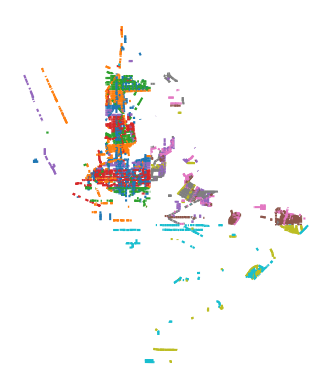

In [5]:
ax = gdf[gdf.PARKINGGROUP == 'Sweeping'].plot(column='ROUTEID')
ax.set_axis_off()

Ingest addresses and routes

In [6]:
a = gpd.read_file('/content/drive/MyDrive/dc-parking-data/Address_Points.geojson')
a_cols = ['ADDRESS', 'ZIPCODE', 'BLOCKKEY', 'ROUTEID', 'LATITUDE', 'LONGITUDE']
a = a[a_cols]
display(a)

,ADDRESS,ZIPCODE,BLOCKKEY,ROUTEID,LATITUDE,LONGITUDE
0,2007 TRENTON PLACE SE,20020.0,fcc2902237670f79fd0c30c4961fe21a,13086512,38.845132,-76.974967
1,1302 TRINIDAD AVENUE NE,20002.0,5cd350f7c73565a6f74f5eb14e25db45,12086642,38.903633,-76.986230
2,1327 UNDERWOOD STREET NW,20012.0,c58ece6c0a1197f3d49c7d4a6bf58224,11087422,38.969201,-77.030962
3,511 BRUMMEL COURT NW,20012.0,a5f5ff0dda8bb1bfba7cc2769e60f98f,11018622,38.980000,-77.021572
4,4712 ALTON PLACE NW,20016.0,a993c626df78a7581d377b3d6e91033b,11010072,38.946903,-77.093389
...,...,...,...,...,...,...
144396,430 INGRAHAM STREET NE,20011.0,8f1ad7cd182f8a5a3aaafda96c6c000d,12048422,38.953901,-76.999537
144397,1228 WYNTON PLACE NE,20017.0,0a82058ea21ade94e4a574544a440eed,12094782,38.944385,-76.988813
144398,1235 WYNTON PLACE NE,20017.0,0a82058ea21ade94e4a574544a440eed,12094782,38.944110,-76.988641
144399,1211 ALLISON STREET NE,20017.0,ee9cc522e3905837df9afd77f68532c4,12009882,38.945089,-76.989226


In [7]:
# & (gdf.ROUTEID == '11072862')
routes = gdf[(gdf.PARKINGGROUP == 'Sweeping') & (gdf.PARKINGDAYGROUP == 'Monday') & (gdf.PARKINGHOURGROUP == 'AM')].set_crs('EPSG:4326')
routes = routes.sort_values(by='MEAS_FROM')
r_cols = ['ROUTEID', 'ZONEID', 'SIGNS', 'SIGNTEXT', 'SIGNCODE', 'MEAS_FROM', 'MEAS_TO', 'STARTTIME', 'ENDTIME', 'BLOCKFACEKEY', 'geometry']
routes = routes[r_cols]
display(routes)

,ROUTEID,ZONEID,SIGNS,SIGNTEXT,SIGNCODE,MEAS_FROM,MEAS_TO,STARTTIME,ENDTIME,BLOCKFACEKEY,geometry
32373,47041752,8626fbb76c07193e58daa8abbf95c67f-right-0,C2ECCF8A,None,R-NS-022,0.000000,142.789200,23.0,31.0,8626fbb76c07193e58daa8abbf95c67f,"MULTILINESTRING Z ((-77.02971 38.93184 0, -77...."
10165,11001232,32ec5f633b209441804d5c35f57ef174-right-0,B685C960,,R-NS-022,0.000000,119.056000,23.0,31.0,32ec5f633b209441804d5c35f57ef174,"LINESTRING Z (-77.02877 38.91812 0, -77.02878 ..."
25447,11080082,6cc6d642ba1545160f1eef2151b18a83-right-0,4D0E2DE2,,R-NS-022,0.000000,69.842003,23.0,31.0,6cc6d642ba1545160f1eef2151b18a83,"LINESTRING Z (-77.02511 38.91997 0, -77.02516 ..."
8406,11001232,2201474bfc23dcc0f69a5531a4b3d060-left-0,F100C51A,,R-NS-022,0.000000,119.056000,23.0,31.0,2201474bfc23dcc0f69a5531a4b3d060,"LINESTRING Z (-77.02889 38.91812 0, -77.02889 ..."
5971,47014912,249101e0e66e79ff2ada8e50e4983606-left-0,494DE1E1,,R-NS-022,0.000000,45.657501,23.0,31.0,249101e0e66e79ff2ada8e50e4983606,"LINESTRING Z (-77.04341 38.9153 0, -77.04363 3..."
...,...,...,...,...,...,...,...,...,...,...,...
64086,11000902,f2e55a1bdb3b30ed325ee359ed0f15f0-left-0,"A9CCBE20,C449C55A",,R-NS-022,6970.043457,7002.028809,23.0,31.0,f2e55a1bdb3b30ed325ee359ed0f15f0,"LINESTRING Z (-77.02567 38.9724 0, -77.02567 3..."
15205,11000902,4babe0e32bdae91601df98eaf779ac80-left-0,422AB372,,R-NS-022,7006.905762,7060.233398,23.0,31.0,4babe0e32bdae91601df98eaf779ac80,"LINESTRING Z (-77.02567 38.97273 0, -77.02567 ..."
998,11000902,0fbbc26c002e9b0bc4e6092049110bdb-left-1,"FB648B3A,D193CC03",,R-NS-022,7060.233398,7100.389648,23.0,31.0,0fbbc26c002e9b0bc4e6092049110bdb,"LINESTRING Z (-77.02567 38.97321 0, -77.02567 ..."
25335,11001302,6725c8ddf0a46131a1ff626c42f7eb7b-right-0,B2024598,,R-NS-022,7142.083008,7158.758301,23.0,31.0,6725c8ddf0a46131a1ff626c42f7eb7b,"LINESTRING Z (-77.02964 38.96087 0, -77.02964 ..."


In [8]:
routes_df = routes.merge(a, on='ROUTEID', how='inner')
routes_gdf = gpd.GeoDataFrame(
    routes_df,
    geometry=gpd.points_from_xy(routes_df.LONGITUDE, routes_df.LATITUDE),
    crs='EPSG:4326'
)
display(routes_gdf.sort_values(by='ADDRESS'))

,ROUTEID,ZONEID,SIGNS,SIGNTEXT,SIGNCODE,MEAS_FROM,MEAS_TO,STARTTIME,ENDTIME,BLOCKFACEKEY,geometry,ADDRESS,ZIPCODE,BLOCKKEY,LATITUDE,LONGITUDE
171602,11068382,46a76de4c58cce77f347c18c4d4d3525-left-0,DB9F1379,,R-NS-022,2529.746826,2576.688232,23.0,31.0,46a76de4c58cce77f347c18c4d4d3525,POINT (-77.00961 38.90979),1 1/2 P STREET NW,20001.0,eee69cf95ada34e062d5c1e1f7afd6c2,38.909787,-77.009606
157253,11068382,84cf5ad23b44a52bbab608c63339bc8e-left-1,"BDA72933,74D960FB",,R-NS-022,2336.048096,2425.520508,23.0,31.0,84cf5ad23b44a52bbab608c63339bc8e,POINT (-77.00961 38.90979),1 1/2 P STREET NW,20001.0,eee69cf95ada34e062d5c1e1f7afd6c2,38.909787,-77.009606
162405,11068382,b17df5ba43d9090d7fb1c6888ad5710c-left-1,"69707B76,9406DFDD",,R-NS-022,2436.798096,2517.250244,23.0,31.0,b17df5ba43d9090d7fb1c6888ad5710c,POINT (-77.00961 38.90979),1 1/2 P STREET NW,20001.0,eee69cf95ada34e062d5c1e1f7afd6c2,38.909787,-77.009606
223608,11068382,b29d88b46d5cd801e5007dc09163857f-right-2,"C4A733FA,E70DB290,2A48C50B,1FB37F0B,430D2FE0",,R-NS-022,3543.365479,3701.366455,23.0,31.0,b29d88b46d5cd801e5007dc09163857f,POINT (-77.00961 38.90979),1 1/2 P STREET NW,20001.0,eee69cf95ada34e062d5c1e1f7afd6c2,38.909787,-77.009606
174799,11068382,5a1ef58455d9e8f59882cd6be3db8cec-left-0,"6C18511A,B49A4FF8,06C552E7,D85114EC",None,R-NS-022,2589.184814,2700.219482,23.0,31.0,5a1ef58455d9e8f59882cd6be3db8cec,POINT (-77.00961 38.90979),1 1/2 P STREET NW,20001.0,eee69cf95ada34e062d5c1e1f7afd6c2,38.909787,-77.009606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312150,11000902,0fbbc26c002e9b0bc4e6092049110bdb-left-1,"FB648B3A,D193CC03",,R-NS-022,7060.233398,7100.389648,23.0,31.0,0fbbc26c002e9b0bc4e6092049110bdb,POINT (-77.02397 38.88975),None,20004.0,ea6918a50e1295d78553a3d6f022e8b5,38.889749,-77.023974
312340,11001302,6725c8ddf0a46131a1ff626c42f7eb7b-right-0,B2024598,,R-NS-022,7142.083008,7158.758301,23.0,31.0,6725c8ddf0a46131a1ff626c42f7eb7b,POINT (-77.02823 38.94294),None,20011.0,3c94c4567539be3cc91386edeb5ae696,38.942943,-77.028234
312968,11001302,6725c8ddf0a46131a1ff626c42f7eb7b-right-0,B2024598,,R-NS-022,7142.083008,7158.758301,23.0,31.0,6725c8ddf0a46131a1ff626c42f7eb7b,POINT (-77.02923 38.96446),None,20011.0,c2d1955d497def9cef4c8fdb1230459d,38.964463,-77.029228
313250,11001302,19988afe7a283be8f02099b1b4f7a904-right-1,"C21C8818,D35B104F",,R-NS-022,7170.645020,7207.974609,23.0,31.0,19988afe7a283be8f02099b1b4f7a904,POINT (-77.02823 38.94294),None,20011.0,3c94c4567539be3cc91386edeb5ae696,38.942943,-77.028234


Ingest tickets

In [9]:
t = gpd.read_file('/content/drive/MyDrive/dc-parking-data/Parking_Violations_Issued_in_June_2024.geojson')
print(len(t))
print(t['VIOLATION_CODE'].isnull().sum())
print(t['ISSUE_DATE'].isnull().sum())

t['ISSUE_DATE'] = pd.to_datetime(t['ISSUE_DATE'])
tickets = t[(t.VIOLATION_CODE == 'P173') & (t.ISSUE_DATE.dt.date == pd.to_datetime('2024-06-17').date())]

print(len(tickets))
print(tickets['LATITUDE'].isnull().sum())
print(tickets['LONGITUDE'].isnull().sum())

tickets = gpd.GeoDataFrame(
    tickets,
    geometry=gpd.points_from_xy(tickets.LONGITUDE, tickets.LATITUDE),
    crs="EPSG:4326"
    )

display(tickets[tickets.LOCATION.str.contains('Q ST NW')])

97428
0
0
529
1
1


,OBJECTID,TICKET_NUMBER,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,LOCATION,PLATE_STATE,...,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,VIOLATION_PROC_DESC,VEHICLE_TYPE,MULTI_OWNER_NUMBER,DISPOSITION_DESC,geometry
34534,83213417,8267347561,2024-06-17 04:00:00+00:00,1007,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,2100 BLOCK Q ST NW SOUTH SIDE,,...,138141.38,38.911,-77.047,813655.0,2024-07-16 14:04:49+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.047 38.911)
34535,83213418,8267347572,2024-06-17 04:00:00+00:00,1008,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,2100 BLOCK Q ST NW SOUTH SIDE,,...,138141.38,38.911,-77.047,813655.0,2024-07-16 14:04:49+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.047 38.911)
34536,83213419,8267347583,2024-06-17 04:00:00+00:00,1009,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,2100 BLOCK Q ST NW SOUTH SIDE,,...,138141.38,38.911,-77.047,813655.0,2024-07-16 14:04:49+00:00,NO PARKING STREET CLEANING,None,20714000,None,POINT (-77.047 38.911)
34537,83213420,8267347594,2024-06-17 04:00:00+00:00,1009,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,2100 BLOCK Q ST NW SOUTH SIDE,,...,138141.38,38.911,-77.047,813655.0,2024-07-16 14:04:49+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.047 38.911)
34539,83213422,8267347616,2024-06-17 04:00:00+00:00,1021,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,2000 BLOCK Q ST NW SOUTH SIDE,,...,138141.54,38.911,-77.046,801713.0,2024-07-16 14:04:49+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.046 38.911)
34540,83213423,8267347620,2024-06-17 04:00:00+00:00,1022,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,2000 BLOCK Q ST NW SOUTH SIDE,,...,138141.54,38.911,-77.046,801713.0,2024-07-16 14:04:49+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.046 38.911)
78532,83257520,8267960116,2024-06-17 04:00:00+00:00,1112,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,1400 BLOCK Q ST NW SOUTH SIDE,,...,138140.98,38.911,-77.033,802123.0,2024-07-16 14:05:03+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.033 38.911)
78533,83257521,8267960120,2024-06-17 04:00:00+00:00,1113,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,1400 BLOCK Q ST NW SOUTH SIDE,,...,138140.98,38.911,-77.033,802123.0,2024-07-16 14:05:03+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.033 38.911)
78534,83257522,8267960131,2024-06-17 04:00:00+00:00,1113,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,1400 BLOCK Q ST NW SOUTH SIDE,,...,138140.98,38.911,-77.033,802123.0,2024-07-16 14:05:03+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.033 38.911)
78535,83257523,8267960142,2024-06-17 04:00:00+00:00,1114,15,DEPARTMENT OF PUBLIC WORKS,DPW,P173,1400 BLOCK Q ST NW SOUTH SIDE,,...,138140.98,38.911,-77.033,802123.0,2024-07-16 14:05:03+00:00,NO PARKING STREET CLEANING,None,0,None,POINT (-77.033 38.911)


In [10]:
routes_gdf.geometry = routes_gdf.geometry.set_precision(grid_size=0.0001).force_2d()
tickets.geometry = tickets.geometry.set_precision(grid_size=0.0001).force_2d()

tickets_and_routes = gpd.sjoin(routes_gdf, tickets, how='inner', predicate='intersects')
tickets_and_routes = tickets_and_routes[['TICKET_NUMBER', 'ROUTEID', 'ISSUE_DATE', 'ISSUE_TIME', 'geometry']]
tickets_and_routes = tickets_and_routes.sort_values(by='TICKET_NUMBER').drop_duplicates()
tickets_and_routes.geometry = tickets_and_routes.geometry.set_precision(grid_size=0.00001)
display(tickets_and_routes)

/usr/local/lib/python3.11/dist-packages/shapely/_geometry.py:814: RuntimeWarning: invalid value encountered in set_precision
  return lib.set_precision(geometry, grid_size, np.intc(mode), **kwargs)


,TICKET_NUMBER,ROUTEID,ISSUE_DATE,ISSUE_TIME,geometry
67448,8263922472,11079562,2024-06-17 04:00:00+00:00,949,POINT (-77.029 38.94)
139759,8265772454,11061362,2024-06-17 04:00:00+00:00,1045,POINT (-77.015 38.957)
32159,8265772465,11011052,2024-06-17 04:00:00+00:00,1105,POINT (-77.035 38.941)
98565,8267329873,11068902,2024-06-17 04:00:00+00:00,1054,POINT (-77.03 38.931)
98565,8267329884,11068902,2024-06-17 04:00:00+00:00,1056,POINT (-77.03 38.931)
...,...,...,...,...,...
187103,8267960175,11072862,2024-06-17 04:00:00+00:00,1117,POINT (-77.033 38.911)
214298,8267960186,11072862,2024-06-17 04:00:00+00:00,1117,POINT (-77.033 38.911)
15816,8267960256,11025932,2024-06-17 04:00:00+00:00,1125,POINT (-77.033 38.912)
15663,8267960260,11025932,2024-06-17 04:00:00+00:00,1127,POINT (-77.033 38.912)


In [11]:
tickets_and_routes['timestamp'] = tickets_and_routes.apply(
    lambda row: str(row['ISSUE_DATE'].date()) + ' ' + row['ISSUE_TIME'],
    axis=1
)

tickets_and_routes['timestamp'] = pd.to_datetime(tickets_and_routes['timestamp'],
                                                             format='%Y-%m-%d %H%M', errors='coerce')
tickets_and_routes = tickets_and_routes[['geometry', 'ROUTEID', 'timestamp']]

display(tickets_and_routes)

,geometry,ROUTEID,timestamp
67448,POINT (-77.029 38.94),11079562,2024-06-17 09:49:00
139759,POINT (-77.015 38.957),11061362,2024-06-17 10:45:00
32159,POINT (-77.035 38.941),11011052,2024-06-17 11:05:00
98565,POINT (-77.03 38.931),11068902,2024-06-17 10:54:00
98565,POINT (-77.03 38.931),11068902,2024-06-17 10:56:00
...,...,...,...
187103,POINT (-77.033 38.911),11072862,2024-06-17 11:17:00
214298,POINT (-77.033 38.911),11072862,2024-06-17 11:17:00
15816,POINT (-77.033 38.912),11025932,2024-06-17 11:25:00
15663,POINT (-77.033 38.912),11025932,2024-06-17 11:27:00


In [12]:
from math import e
import folium
import branca.colormap as cm

map = folium.Map(location=[38.90720, -77.03690], zoom_start=12, tiles="cartodb positron")

#TO-DO: compute elapsed_minutes within ROUTEID as well as colormap but then plot for each ROUTEID layer the respective colormap and elapsed_minutes in popup ("since street cleaning route started")

tickets_and_routes['elapsed_minutes'] = (tickets_and_routes['timestamp'] - tickets_and_routes['timestamp'].min()).dt.total_seconds() / 60

colormap = cm.linear.Blues_03.scale(
    tickets_and_routes.elapsed_minutes.min(),
    tickets_and_routes.elapsed_minutes.max()
    )

geometry_counts = tickets_and_routes.groupby(['geometry', 'ROUTEID'])['timestamp'].count().reset_index()
earliest_timestamps = tickets_and_routes.groupby(['geometry', 'ROUTEID'])['timestamp'].min().rename('earliest_timestamp').reset_index()

route_layers = {}
for route_id in tickets_and_routes['ROUTEID'].unique():
  route_data = tickets_and_routes[tickets_and_routes['ROUTEID'] == route_id]
  route_fg = folium.FeatureGroup(name=f"Route {route_id}")

  for idx, row in route_data.sort_values(by='elapsed_minutes').iterrows():
      lon = row.geometry.x
      lat = row.geometry.y
      count_for_geometry = int(geometry_counts[geometry_counts.geometry == row.geometry]['timestamp'].iloc[0] if geometry_counts[geometry_counts.geometry == row.geometry]['timestamp'].size > 0 else 0)
      earliest_timestamp = earliest_timestamps[(earliest_timestamps.geometry == row.geometry) & (earliest_timestamps.ROUTEID == route_id)]['earliest_timestamp'].iloc[0]

      popup_html = f"""
      <h1> Street sweeping summary:</h1>
      <p># of tickets: {count_for_geometry}</p>
      <p>Started at: {earliest_timestamp}</p>
      """

      folium.CircleMarker(
          location=[lat, lon],
          radius=count_for_geometry,
          color='none',
          fill=True,
          fill_color=colormap(row.elapsed_minutes),
          fill_opacity=0.7,
          popup=popup_html
      ).add_to(route_fg)

  route_layers[route_id] = route_fg
  route_fg.add_to(map)


colormap.add_to(map)
folium.LayerControl().add_to(map)

map

<Axes: xlabel='x', ylabel='y'>

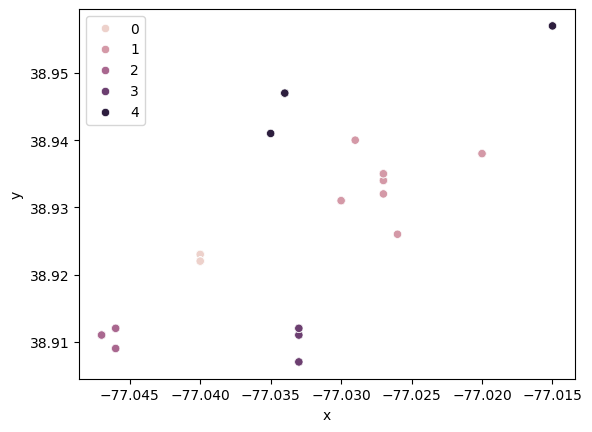

In [19]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

valid_geometries = [point for point in tickets_and_routes.geometry if point is not None]
X = np.array([(point.centroid.x, point.centroid.y) for point in valid_geometries])
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)
sns.scatterplot(data = pd.DataFrame(X, columns=['x', 'y']), x = 'x', y = 'y', hue = kmeans.labels_)

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from shapely.geometry import Point
from shapely.ops import transform
import pyproj

# Define a function to calculate the distance between two points in miles
def calculate_distance_miles(point1, point2):
    geod = pyproj.Geod(ellps='WGS84')
    angle1, angle2, distance = geod.inv(point1.x, point1.y, point2.x, point2.y)
    return distance / 1609.34  # Convert meters to miles

# Create a list to store the features and labels
features = []
labels = []

# Iterate through each geometry in gdf
for geometry in gdf.geometry:
    if geometry is not None:
        # Iterate through each cluster centroid
        for cluster_label in range(len(np.unique(kmeans.labels_))):
            cluster_centroid = X[kmeans.labels_ == cluster_label].mean(axis=0)
            cluster_centroid_point = Point(cluster_centroid[0], cluster_centroid[1])
            distance = calculate_distance_miles(geometry.centroid, cluster_centroid_point)

            # Create feature vector (distance)
            feature = [distance]
            features.append(feature)

            # Create label (1 if within 1 mile, 0 otherwise)
            label = 1 if distance <= 1 else 0
            labels.append(label)

# Train the logistic regression model
model = LogisticRegression()
model.fit(features, labels)

# Now you can use the trained model to predict the probability that each geometry is within 1 mile of each cluster centroid
# For example, to predict the probability for the first geometry and the first cluster centroid:
# probability = model.predict_proba([features[0]])[0][1]

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = model.predict(features)

accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions)
recall = recall_score(labels, predictions)
f1 = f1_score(labels, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9999209618336855
Precision: 1.0
Recall: 0.9993821439604572
F1-score: 0.9996909765142151
